## Q1
### (a)

**Input**: $\textbf{a} \in \mathbb{R}^{n-1}, \textbf{b} \in \mathbb{R}^{n}, \textbf{v}\in \mathbb{R}^{n-1}$

**Output**: $\textbf{l} \in \mathbb{R}^{n-1}, \textbf{u} \in \mathbb{R}^{n}, \textbf{v}\in \mathbb{R}^{n-1}$
1. $\textbf{l} = \textbf{0}$
1. for $i = 1, \cdots, n$
    - if $i \neq n$:
        - $v_i = c_i$
    - if $i > 1$:
        - $l_i = a_i / u_{i-1}$
    - $u_i = b_i - l_i v_{i-1}$
1. endfor

### (b)
$C(n) = 3n - 1$

There are $n$ interations. For each iteration, calculation of $l_i$ takes one operation, $u_i$ takes two operations, and $v_i$ takes none. The first iteration does not calculate $l_i$ and $v_i$. Therefore, the total number of operations is $3n - 1$.

### (c)

In [20]:
import numpy as np
def LUtri(a, b, c):
    """
    LU factorisation of a tridiagonal matrix
    Input:
        a, b, c: numpy arrays of size n-1, n, n-1
    Output:
        l, u, v: numpy arrays of size n-1, n, n-1
    """

    n = b.size

    # initialise l, u, v
    l = np.zeros(n-1) # we have l[i] = l_{i+2}
    u = np.zeros(n) # u[i] = u_{i+1}
    v = np.zeros(n-1) #v[i] = v_{i+1}

    for i in range(1,n+1):
        # thes line simply implements the algorithm
        u[i-1] = b[i-1] - l[i-2]*v[i-2]
        if i != n:
            v[i-1] = c[i-1]
        if i > 1:
            l[i-2] = a[i-2]/u[i-2]
        u[i-1] = b[i-1] - l[i-2]*v[i-2]
    
    return l, u, v


In [21]:
import numpy as np
# These are some auxiliary functions
def get_abc_From_A(A):
    """
    input:
        n*n matrix A as numpy array
    output:
        n-1 dimensional vector a
        n dimensional vector b
        n-1 dimensional vector c
        They are input of LUtri
    """
    b = np.diag(A)
    a = np.diag(A, k=-1)
    c = np.diag(A, k=1)
    return a, b, c

def get_A_From_abc(a, b, c):
    """
    input:
        n-1 dimensional vector a
        n dimensional vector b
        n-1 dimensional vector c
    output:
        n*n matrix A as numpy array
    """
    n = b.size
    A = np.zeros((n,n))
    A = np.diag(a, k=-1) + np.diag(b, k=0) + np.diag(c, k=1)
    return A

def random_tridiagonal_matrix(n):
    """
    input:
        n: dimension
    output:
        n*n matrix A as numpy array
    """
    a = np.random.rand(n-1)
    b = np.random.rand(n)
    c = np.random.rand(n-1)
    
    return get_A_From_abc(a, b, c)

def get_L_from_l_of_LUtri(l):
    """ 
    input:
        n dimensional vector l from LUtri
    output:
        n*n matrix L as numpy array, that is L = diag(1) + diag(l, -1)
    """

    return np.diag(np.ones(len(l)+1), 0) + np.diag(l, -1)

def get_U_from_u_v_of_LUtri(u, v):
    """ 
    input: 
        n dimensional vector u from LUtri
        n dimensional vector v from LUtri
    output:
        n*n matrix U as numpy array, that is U = diag(u) + diag(v, 1)
    """
    return np.diag(u, 0) + np.diag(v, 1)


A = 


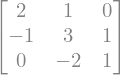

L = 


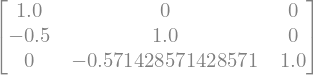

U = 


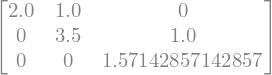

checking that A = LU
LU = 


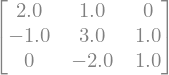

In [42]:
import numpy as np
from sympy import init_printing, Matrix
init_printing()
# construct A as instructed
A = np.array([[2, 1, 0], [-1, 3, 1], [0, -2, 1]])

# extract the diagonals
a, b, c = get_abc_From_A(A)

# call LUtri
l, u, v = LUtri(a, b, c)

# construct L and U from the output of LUtri
L = get_L_from_l_of_LUtri(l)
U = get_U_from_u_v_of_LUtri(u, v)

#check that A = LU
print("A = ")
display(Matrix(A))
print("L = ")
display(Matrix(L))
print("U = ")
display(Matrix(U))
print("checking that A = LU")
print("LU = ")
display(Matrix(L@U))

### (d) Benchmarking

In [23]:
def LU(A):
    
    # Find dimension of A
    n = A.shape[0]
    
    # Initialise L=I, U=A
    L = np.eye(n) 
    U = np.copy(A)

    for k in range(n - 1): # loop over columns 1 to n-1
        for j in range(k + 1, n): # loop over rows k+1 to n
            L[j, k] = U[j, k] / U[k ,k] # compute the multiplier l_jk
            U[j, k:] = U[j, k:] - L[j, k] * U[k, k:] # subtract a multiple of row k 
                                                     # from row j to create zeros 
                                                     # below the diagonal in column k
    
    return L, U # return the LU factorisation of A

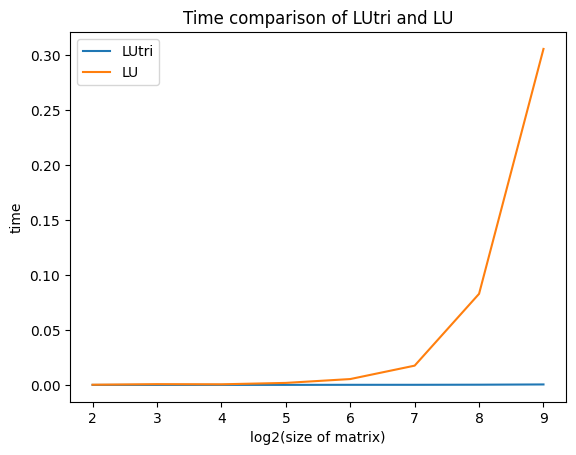

It seems that LUtri is much faster than LU.


In [47]:
import time
import numpy as np
import matplotlib.pyplot as plt

time_LUtri = []
time_LU = []
size_of_matrix = []

for j in range(2, 10):
    A = random_tridiagonal_matrix(2**j)
    a, b, c = get_abc_From_A(A)


    tmp = time.time()
    LUtri(a, b, c)
    time_LUtri.append(time.time() - tmp)

    tmp = time.time()
    LU(A)
    time_LU.append(time.time() - tmp)

    size_of_matrix.append(j)

plt.plot(size_of_matrix, time_LUtri, label="LUtri")
plt.plot(size_of_matrix, time_LU, label="LU")
plt.xlabel("log2(size of matrix)")
plt.ylabel("time")
plt.title("Time comparison of LUtri and LU")
plt.legend()
plt.show()

print("It seems that LUtri is much faster than LU.")



### 1(e)

In [48]:
import numpy as np

def FStri(L, r):
    """
    Forward substitution for a lower triangular matrix
    Input:
        L: numpy array of size n*n
        r: numpy array of size n
    Output:
        y: numpy array of size n
    """
    n = r.size
    y = np.zeros(n)
    y[0] = r[0]
    for i in range(1,n):
        y[i] = r[i] - L[i][i-1]*y[i-1]

    return y

def BStri(U, y):
    """
    Backward substitution for an upper triangular matrix
    Input:
        U: numpy array of size n*n
        y: numpy array of size n
    Output:
        x: numpy array of size n
    """
    n = y.size
    x = np.zeros(n)
    x[n-1] = y[n-1]/U[n-1][n-1]
    for i in range(n-2,-1,-1):
        x[i] = (y[i] - U[i][i+1]*x[i+1])/U[i][i]

    return x


def GEtri(A, r):
    """
    Gaussian elimination for a tridiagonal matrix
    Input:
        A: numpy array of size n*n
        r: numpy array of size n
    Output:
        x: numpy array of size n
    """
    
    a, b, c = get_abc_From_A(A)
    l, u, v = LUtri(a, b, c)
    L  = get_L_from_l_of_LUtri(l)
    U = get_U_from_u_v_of_LUtri(u, v)
    y = FStri(L, r)
    x = BStri(U, y)
    return x


In [52]:
a = np.array([1, 3, 1])
b = np.array([1, 1, -2, 3])
c = np.array([2, -1, 1])

r = np.array([1,2,3,4])

A = get_A_From_abc(a, b, c)
x = GEtri(A, r)
print("The solution of Ax = r is (given by GEtri):")
print(x)

print("Checking that Ax = r:")
print(A@x)

The solution of Ax = r is (given by GEtri):
[ 1.25  -0.125 -0.875  1.625]
Checking that Ax = r:
[1. 2. 3. 4.]


## Q2
### Q2(a)

Use taylor expansion of $w(x \pm h)$:
$$
w(x + h) = w(x) + h w'(x) + \frac{h^2}{2} w''(x) + O_1(h^3)
$$

$$
w(x - h) = w(x) - h w'(x) + \frac{h^2}{2} w''(x) + O_2(h^3)
$$

Combine them and we have 

$$
w(x + h) + w(x - h) \approx 2w(x) + h^2 w''(x) \Rightarrow w''(x) \approx \frac{w(x + h) + w(x - h) - 2w(x)}{h^2}
$$

### Q2(b)

We have discretisation :
$$
\frac{w_{j+1} - 2 w_j + w_{j-1}}{h^2} + \omega^2 w_j = \omega^2 f(x_j), \quad j=1,\cdots,N-1, \quad w_0 = w_N = 0,
$$

This is a linear system of $N-1$ equations with $N-1$ unknowns. We can write it in matrix form:


$$
\textbf{A} \textbf{w} = \textbf{r}
$$
That is:
$$
\begin{bmatrix}
    -\frac{2}{h^2} + \omega^2 & \frac{1}{h^2} & 0 & \cdots & 0 \\
    \frac{1}{h^2} & -\frac{2}{h^2} + \omega^2 & \frac{1}{h^2} & \cdots & 0 \\
    0 & \frac{1}{h^2} & -\frac{2}{h^2} + \omega^2 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \cdots & -\frac{2}{h^2} + \omega^2
\end{bmatrix}
\begin{bmatrix}
    w_1 \\
    w_2 \\
    w_3 \\
    \vdots \\
    w_{N-1}
\end{bmatrix}
=
\begin{bmatrix}
    \omega^2 f(x_1) \\
    \omega^2 f(x_2) \\
    \omega^2 f(x_3) \\
    \vdots \\
    \omega^2 f(x_{N-1})
\end{bmatrix}
$$

clearly, $\textbf{A}$ is a tridiagonal matrix, and the diagonals are given bellow:

$\textbf{a}_i = \textbf{c}_i= \frac{1}{h^2} $ They are $N-2$ dimensional vectors.

$\textbf{b}_i = (-\frac{2}{h^2} + \omega^2)$ They are $N-1$ dimensional vectors.

$\textbf{r}_i = \omega^2 f(x_i)$

### Q2(c)


In [58]:
def BVP(N, omega, f):
    """
    Solve the BVP 
    w''(x) + omega^2*w(x) = omega^2 f(x)
    With boundary conditions w(0) = w(1) = 0

    The solution is calculated based on the system of linear equations given above.
    Input:
        N: number of grid points
        omega: a parameter
        f: function f(x)
    Output:
        x: a numpy array of size N that is the independent variable of the solution
        w: a numpy array of size N that is the dependent variable of the solution
        w(x) is the solution of the BVP
    """
    # calculate h
    h = 1/N
    # construct the tridiagonal matrix
    x = np.linspace(0, 1, N+1)
    a = np.ones(N-2)/(h**2)
    c = a 
    b = (-2/(h**2) + omega**2)*np.ones(N-1)
    r = omega**2*f(x[1:-1])

    # solve the tridiagonal system
    w = GEtri(get_A_From_abc(a, b, c), r)
    
    # add the boundary conditions
    w = np.insert(w, 0, 0)
    w = np.append(w, 0)
    return x, w

In [56]:

def w_exact(x, omega):
    """
    This is the exact solution of the BVP when f(x) = 1
    """
    return (np.sin(omega) - np.sin(omega*x) - np.sin(omega*(1-x)))/(np.sin(omega))



## Q2(d)

In [61]:
import numpy as np
# the exact solution

def error(N, omega):
    """
    Calculate the error of the numerical solution
    Input:
        N: number of grid points
        omega: a parameter
        f: function f(x)
    Output:
        e: the error
    """
    def functionf(x):
        return x-x+1
    x, w = BVP(N, omega, functionf)
    diff = w[1:-1] - w_exact(x, omega)[1:-1]
    e = np.linalg.norm(diff, ord=2)
    return e

def get_norm_of_exact(N, omega):
    """
    Calculate the norm of the exact solution
    Input:
        N: number of grid points
        omega: a parameter
    """
    x = np.linspace(0, 1, N+1)
    x = np.delete(x, 0)
    solution = w_exact(x, omega)
    return np.linalg.norm(solution, ord=2)


omega = 20

errorList = []

n_list = [int(i) for i in np.linspace(100, 2000, 100)]

for i in n_list:
    errorList.append(error(int(i), omega)/get_norm_of_exact(int(i), omega))


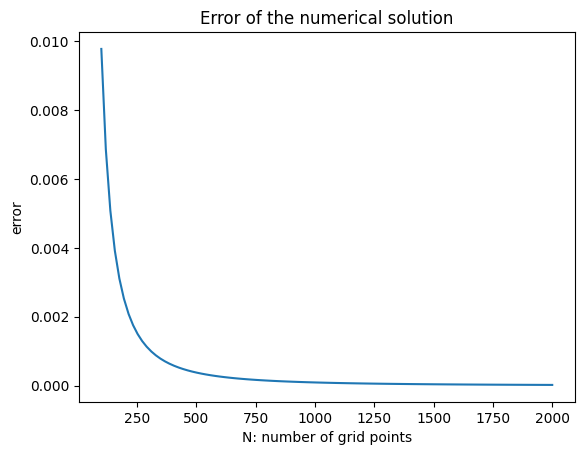

It seems that the error exponentially decreases as N increases.


In [116]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(n_list, errorList)  # Plot some data on the axes
ax.set_xlabel('N: number of grid points')
ax.set_ylabel('error')
ax.set_title('Error of the numerical solution')
plt.show()

print("It seems that the error exponentially decreases as N increases.")


## Q3 
### Q3(a)

In [31]:
def LUtriRec(a, b, c):
    '''
    LUtri factorisation by a divide-and-conquer method.
    Assuming that the b has length of 2^k
    Input: 
        a, b, c: numpy arrays of size n-1, n, n-1
        They are the subdiagonal, diagonal, and superdiagonal of a tridiagonal matrix
    Output:
        l, u, v: numpy arrays of size n-1, n, n-1
        l, 1 are the subdiaganol and diagonal of a lower triangular matrix L
        u, v are the diagonals and superdiagonal of an upper triangular matrix U
    '''

    # input checkiing
    if a.size != b.size - 1 or c.size != b.size - 1:
        raise ValueError("The size of a, b, c are not compatible")
    if ((b.size & (b.size - 1)) != 0) and b.size != 0:
        raise ValueError("The size of b is not a power of 2")

    n = b.size # we have assumed that n = 2^k
    m = n // 2

    if m == 1:  # end of recursion 
        # this is manual calculation of l, u, v for 2*2 matrix
        # we want to return nparray
        l = np.array([a[0]/b[0]])
        v = np.array([c[0]])
        u = np.array([b[0], b[1] - l[0]*v[0]])
        return l, u, v
    

    l_11, u_11, v_11 = LUtriRec(a[:m-1], b[:m], c[:m-1])

    v_12 = np.array([c[m-1]])
    l_21 = np.array([a[m-1]/u_11[-1]])

    b_prime = b.copy()
    b_prime[m] = b[m] - l_21[0]*v_12[0]
    l_22, u_22, v_22 = LUtriRec(a[m:], b_prime[m:], c[m:])
    
    l = np.concatenate((l_11, l_21, l_22))
    u = np.concatenate((u_11, u_22))
    v = np.concatenate((v_11, v_12, v_22))

    return l, u, v

In [55]:
import sympy as sym
sym.init_printing(use_unicode=True)

# verification

print("Verification of LUtriRec")

for i in range(4, 12):
    A = random_tridiagonal_matrix(2**i)

    l, u, v = LUtriRec(*get_abc_From_A(A))

    L = get_L_from_l_of_LUtri(l)
    U = get_U_from_u_v_of_LUtri(u, v)
    print("for", i, "**2 dimensional matrix ")
    print(np.allclose(A, L@U))

Verification of LUtriRec
for 4 **2 dimensional matrix 
True
for 5 **2 dimensional matrix 
True
for 6 **2 dimensional matrix 
True
for 7 **2 dimensional matrix 
True
for 8 **2 dimensional matrix 
True
for 9 **2 dimensional matrix 
True
for 10 **2 dimensional matrix 
True
for 11 **2 dimensional matrix 
True


### 3(b)

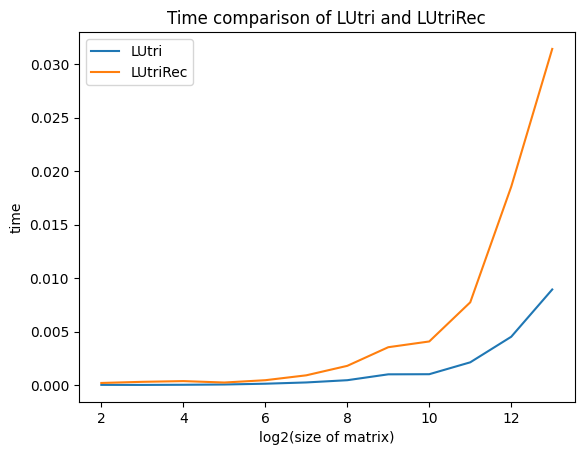

It seems that LUtriRec has no computational advantage over LUtri. In fact, it is slower than LUtri.


In [63]:
# Compare the time of LUtri and LUtriRec
import time
import numpy as np
import matplotlib.pyplot as plt

time_LUtri = []
time_LUtriRec = []
size_of_matrix = []

for j in range(2, 14):
    A = random_tridiagonal_matrix(2**j)
    a, b, c = get_abc_From_A(A)


    tmp = time.time()
    LUtri(a, b, c)
    time_LUtri.append(time.time() - tmp)

    tmp = time.time()
    LUtriRec(a, b, c)
    time_LUtriRec.append(time.time() - tmp)

    size_of_matrix.append(j)

plt.plot(size_of_matrix, time_LUtri, label="LUtri")
plt.plot(size_of_matrix, time_LUtriRec, label="LUtriRec")
plt.xlabel("log2(size of matrix)")
plt.ylabel("time")
plt.title("Time comparison of LUtri and LUtriRec")
plt.legend()
plt.show()

print("It seems that LUtriRec has no computational advantage over LUtri. In fact, it is slower than LUtri.")

## Q4
### Q4(a) 
#### (i)

We know $\textbf{y}_{t-1} = ||\textbf{x}_{t-1}||^{-1}\textbf{x}_{t-1}$. 
Thus 

$\textbf{A}_t \textbf{y}_{t-1} = ||\textbf{x}_{t-1}||^{-1}\textbf{A}_t\textbf{x}_{t-1} = ||\textbf{x}_{t-1}||^{-1} \textbf{x}_t$. 

As $||\textbf{x}_{t-1}||^{-1}> 0$ the vector 
$\textbf{A}_t\textbf{y}_{t-1}$ and $\textbf{x}_t$ are in the same direction, which means that $\frac{\textbf{A}\textbf{y}_{t-1}}{||\textbf{A}\textbf{y}_{t-1}||} = \frac{\textbf{x}_t}{||\textbf{x}_t||} = \textbf{y}_t$.


### (ii)


We know that $\textbf{y}_t = \frac{\textbf{A}_t \textbf{y}_{t-1}}{||\textbf{A}_t \textbf{y}_{t-1}||}$. Apply it repeatedly we get 

$$ \textbf{y}_t = \frac{\textbf{A}_t \textbf{A}_{t-1} \textbf{A}_{t-2} \cdots \textbf{A}_{1}\textbf{y}_0}
{||\textbf{A}_t \textbf{y}_{t-1}||\cdot ||\textbf{A}_{t-1} \textbf{y}_{t-2}|| \cdots ||\textbf{A}_1 \textbf{y}_{0}||} $$

Since $||\textbf{x}_0|| = 1$, we know $\textbf{x}_0 = \textbf{y}_0$. Moreover, as $\textbf{x}_t = \textbf{A}_t \textbf{A}_{t-1} \textbf{A}_{t-2} \cdots \textbf{A}_{1}\textbf{x}_0 $
we conclude the above equation becomes $$ \textbf{y}_t = \frac{\textbf{x}_t}
{||\textbf{A}_t \textbf{y}_{t-1}||\cdot ||\textbf{A}_{t-1} \textbf{y}_{t-2}|| \cdots ||\textbf{A}_1 \textbf{y}_{0}||} $$

Notice $\textbf{y}_t = \frac{\textbf{x}_t}{||\textbf{x}_t||} $. Thus we conlude 

$$
||\textbf{x}_t|| = ||\textbf{A}_t \textbf{y}_{t-1}||\cdot ||\textbf{A}_{t-1} \textbf{y}_{t-2}|| \cdots ||\textbf{A}_1 \textbf{y}_{0}|| 
\implies \ln ||\textbf{x}_t|| = \sum_{i=1}^t \ln ||\textbf{A}_i \textbf{y}_{i-1}||
$$

Thus, $h_t = t^{-1}\ln ||\textbf{x}_t|| = t^{-1}\sum_{i=1}^t \ln ||\textbf{A}_i \textbf{y}_{i-1}||$.

### iii

The estimated Lyapunov exponent is  1.7916736236541069


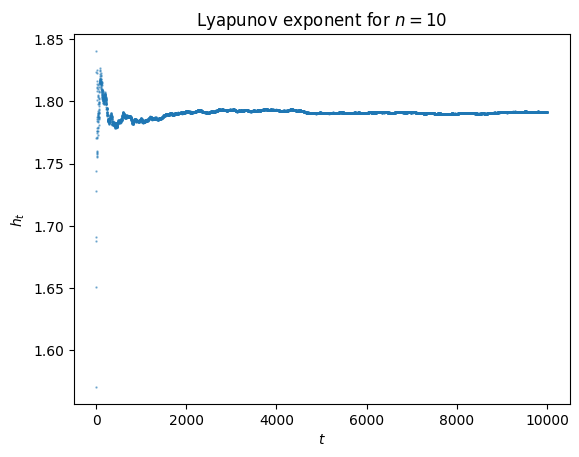

In [104]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

def LYA1(n, sigma, t):

    t_end = t # maximum of t

    t = [k for k in range(1,t_end+1)] # list if values of t
    x = np.ones(n) # initialise  x_0
    y = x / np.linalg.norm(x) # initialise y_0
    h = [] # list of values of h_t
    partial_sum_r = 0 # partial sum of r
    for k in range(t_end):
        A = random.normal(0,sigma,(n,n)) # draw random matrix
        ay = A @ y
        partial_sum_r += np.log(np.linalg.norm(ay))
        h.append(partial_sum_r/(k+1))
        y = ay/np.linalg.norm(ay)
    return t, h    

t, h = LYA1(10, 2, 10000)

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.scatter(t,h, s=0.5,alpha=0.5)
ax.set_xlabel('$t$')
ax.set_ylabel('$h_t$')
ax.set_title('Lyapunov exponent for $n=10$')

lyapunov = np.array(h[-10:]).mean()
print("The estimated Lyapunov exponent is ", lyapunov)


### Q4 (b)

### b i

consider the QR factorisation of $T = [\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}] = QR$

We know $\lambda_1 + \lambda_2 + \cdots +\lambda_k= det (T)$

As $\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}$ are orthonormal to $\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t$, by QR algorithm we know $R$ shall take the form of 

$$
R =
\begin{bmatrix}
    R_1 & 0 \\
    0 & I
\end{bmatrix}
$$

where $R_1$ is a $k \times k$ upper triangular matrix.  
Let $\rho_{jj}$ denote the $j$ th diaganol entry of $R$

Also, $|det T| = |det(Q)| |det(R)|$. As determinant of orthornromal matrix $Q$ is $\pm 1$, we and R is upper triangular, we know $|det T| = |det(R)| = \prod_{i=1}^n |\rho_{ii}| \implies \ln |det T| = \sum_{i=1}^n \ln |\rho_{ii}|$.
Importantly, The last $n-k$ terms of diangnols of $R$ is 1. Thus $\ln |det T| = \sum_{i=1}^k \ln |\rho_{ii}|$.

Beginning with $k=1$, obviously $\lambda_1 = \ln |det T| = \ln |\rho_{11}|$. For $k=2$, we know $\lambda_1 + \lambda_2 = \ln |\rho_{11}| + \ln |\rho_{22}|$, thus $\lambda_2 = \ln |\rho_{22}$ Similarly, we can find $\lambda_k = \ln |\rho_{kk}|$.

By the algorithm of $QR$ decomposition, $\rho_{jj} = ||\mathbf{c}_j||$, where $\mathbf{c}_j$ is the $j$ th column of $R$. Thus $\lambda_j = \ln ||\mathbf{c}_j|| =\ln ||\mathcal{A} x_{0}^{(j)}||$
denoting $\mathbf{A}_t\cdots \mathbf{A}_1$ as $\mathcal{A}$.

Let $\mathcal{Q}\mathcal{R}$ be the QR decomposition of $\mathcal{A}$. And  let $r_{jj}$ denote the $j$ th entry of diaganol of $\mathcal{R}$.
All's left is to show that as $t$ approach infinity, $$ \ln ||\mathcal{A} x_{0}^{(j)}|| = \ln ||\mathcal{Q}\mathcal{R} x_{0}^{(j)}|| = \ln |r_{jj}|$$

(I do not know how to prove this part)

### b ii


**Input**: $n, \sigma, t$, where random matrix $\textbf{A}_1 \cdots \textbf{A}_t \in \mathbb{R}^{n\times n}$ has each entry has independent normal distribution with mean $0$ and variance $\sigma^2$.

**Output**: A vector $L \in \mathbb{R}^n = \{\lambda_1, \lambda_2, \cdots, \lambda_n \}$, 
1. $L = \textbf{0}$, $\textbf{Q} = \textbf{I}$
1. for $i = 1, \cdots, t$
    * Find QR decomposition of $\textbf{A}_i\textbf{Q} = \textbf{Q}_1\textbf{R}$
    * $\textbf{Q}$ = $\textbf{Q}_1$
    * for $j = 1, \cdots, n$
        - $L_j$ = $L_j + \ln |\textbf{R}_{j,j}|$
    * endfor
1. endfor
1. for $j = 1, \cdots, n$
    - $L_j$ = $L_j/t$
1. endfor
1. return $L$

**Justification**:

We know that $\lambda_k$ is approching $t^{-1}\ln |r_{kk}|$, as $t \rightarrow \infty$, where $r_{kk}$ is the $k$ th diagonal entry of $\textbf{R}$. Given the QR factorisation of $\textbf{A}_t \cdots \textbf{A}_1 = \mathbf{Q}\mathbf{R}$

Instead of calculating $\textbf{A}_t \cdots \textbf{A}_1$ directly and compute its QR decomposition. We can calculate 

the QR factorisation of $\mathbf{A}_j \mathbf{Q}_{j-1} =  \mathbf{Q}_j \mathbf{R}_j$, with $\mathbf{A}_1 = \mathbf{Q}_1 \mathbf{R}_1$.
 
Notice that
$$ \mathbf{Q}_t \mathbf{R}_t \mathbf{R}_{t-1}\cdots \mathbf{R}_1 =
\mathbf{A}_t\mathbf{Q}_{t-1} \mathbf{R}_{t-1} \cdots \mathbf{R}_1 =
\mathbf{A}_t\mathbf{A}_{t-1} \mathbf{R}_{t-2} \mathbf{R}_{t-2} \cdots \mathbf{R}_1 = \cdots = 
\mathbf{A}_t \mathbf{A}_{t-1} \cdots \mathbf{A}_1
$$

Thus, $\mathbf{R} = \mathbf{R}_t \mathbf{R}_{t-1}\cdots \mathbf{R}_1$ and $\mathbf{Q} = \mathbf{Q}_t$.

Importantly, as $\mathbf{R}_i$ are upper triangular, we know that the $j$ th diagonal entry of $\mathbf{R}$ is the product of $j$ th diagonal entries of all $\mathbf{R}_i$. Thus, we can calculate the natural log of the $j$ th diagonal entry of $\mathbf{R}$ by summing up the natural log of the $j$ th diagonal entries of all $\mathbf{R}_i$.


### b iii

In [64]:
def LYAall(n, sigma, t):
    """
    Calculate all of the Lyapunov exponent with n-dimension, standard deviation sigma, and t iterations
    Input: 
        n: dimension
        sigma: parameter
        t: number of iterations
    Output:
        L: numpy array of size n
        L[i] is the Lyapunov exponent for i+1
    """

    L = np.ones(n)
    Q = np.eye(n)
    for i in range(t):
        A = random.normal(0,sigma,(n,n))
        Q, R = np.linalg.qr(A@Q)
        L += np.log(np.abs(np.diag(R)))
    return L/t


In [40]:
from scipy.special import digamma
import numpy as np
from tabulate import tabulate


def lambda_exact(n, sigma, k):
    """
    Calculate the exact value of the k-th Lyapunov exponent
    Input:
        n: dimension
        sigma: parameter
        k: index of the Lyapunov exponent
    Output:
        lambda_k: the exact value of the k-th Lyapunov exponent
    """
    return np.log(sigma) + 1/2*(np.log(2) + digamma((n-k+1)/2))

dimension = 10
sigma = 2
t = 10000

L = LYAall(dimension, sigma, t)
L_exact = [lambda_exact(dimension, sigma, k) for k in range(1, dimension+1)]
difference = (L - L_exact)/L_exact*100

In [41]:
table = []
for i in range(dimension):
    table.append([i+1, L[i], L_exact[i], difference[i]])

print("Estimation of Lyapunov exponents with n = ", dimension, " and sigma = ", sigma, " and number of interation = ", t)
print(tabulate(table, headers=["kth lyapunov", "lyapunov calculated", "exact", "percent error, %"]))

Estimation of Lyapunov exponents with n =  10  and sigma =  2  and number of interation =  10000
  kth lyapunov    lyapunov calculated      exact    percent error, %
--------------  ---------------------  ---------  ------------------
             1              1.79253    1.79278          -0.0136956
             2              1.73251    1.73416          -0.094872
             3              1.66777    1.66778          -0.000308763
             4              1.59092    1.5913           -0.0236984
             5              1.50727    1.50111           0.410036
             6              1.39048    1.3913           -0.0587079
             7              1.25668    1.25111           0.444889
             8              1.05642    1.05797          -0.14644
             9              0.755915   0.751113          0.639326
            10              0.0504724  0.0579658       -12.9272
